In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, spearmanr, skew

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, auc

!pip install tensorflow
import tensorflow as tf

In [4]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/bank-direct-marketing-campaigns.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

**GIẢI THÍCH DỮ LIỆU:**

**1.age:** Tuổi

**2.job:** Nghề nghiệp

**3.marital:** Tình trạng hôn nhân

**4.education:** Cấp bậc giáo dục

**5.default:** Thẻ tín dụng có mặc định hay không

**6.balance:** Số dư bình quân hàng năm

**7.housing:** Có khoản vay mua nhà không

**8.loan:** Có khoản vay cá nhân không

**9.contact:** Kiểu liên lạc trực tiếp

**10.day_of_week:** Ngày liên lạc cuối cùng trong tuần

**11.month:** Tháng liên lạc cuối cùng trong năm

**12.duration:** Thời gian của lần liên lạc cuối (tính bằng giây)

**13.campaign:** Số lượng cuộc gọi đã thực hiện

**14.pdays:** Số ngày kể từ lần liên lạc cuối

**15.previous:** Số lượng liên hệ đã thực hiện trước chiến dịch này

**16.poutcome:** Kết quả của chiến dịch trước đó (thất bại, thành công)

**17.emp.var.rate:** Tỷ lệ biến đổi của việc làm (quý 3 so với cùng kỳ năm trước).

**18.cons.price.idx:** Chỉ số giá tiêu dùng.

**19.cons.conf.idx:** Chỉ số tin cậy của người tiêu dùng.

**20.euribor3m:** Tỷ lệ lãi suất Euribor 3 tháng.

**21.nr.employed:** Số lượng nhân viên được tuyển dụng (thực tế).

**22.y:** Output-Khách hàng có đồng ý đăng ký khoản tiền hay không

**EDA**

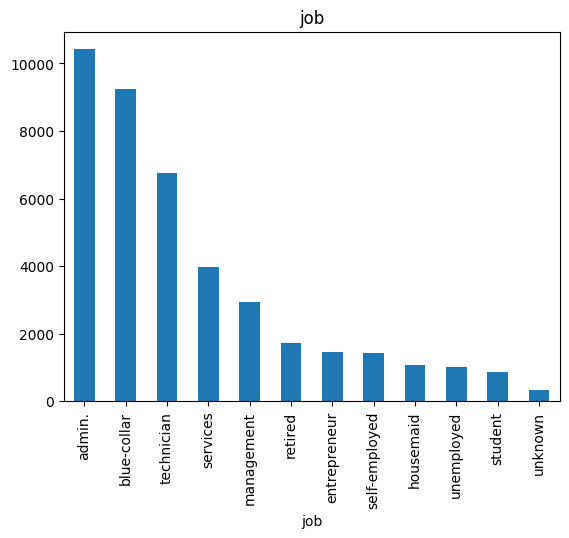

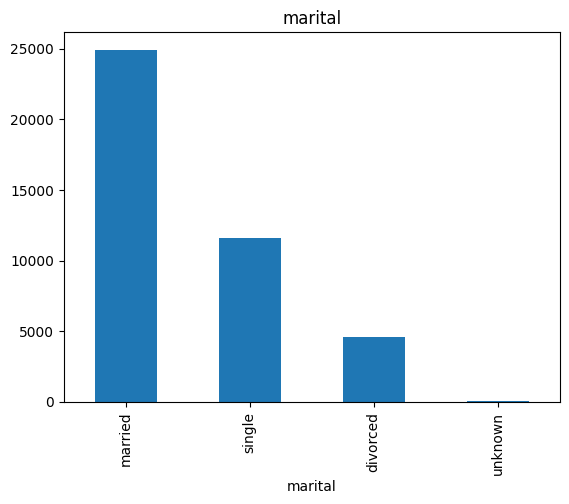

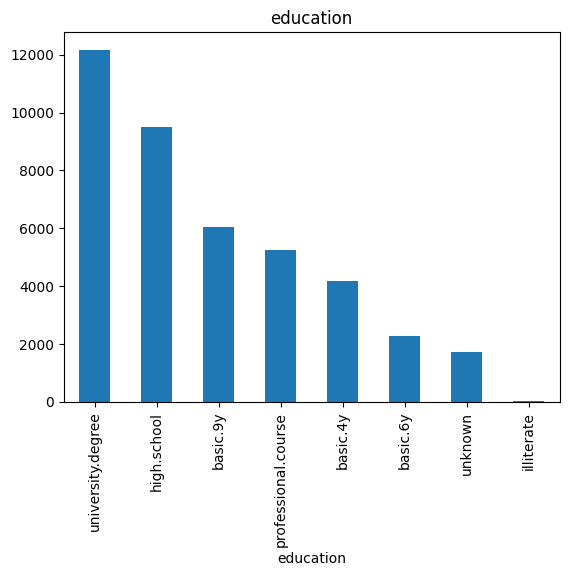

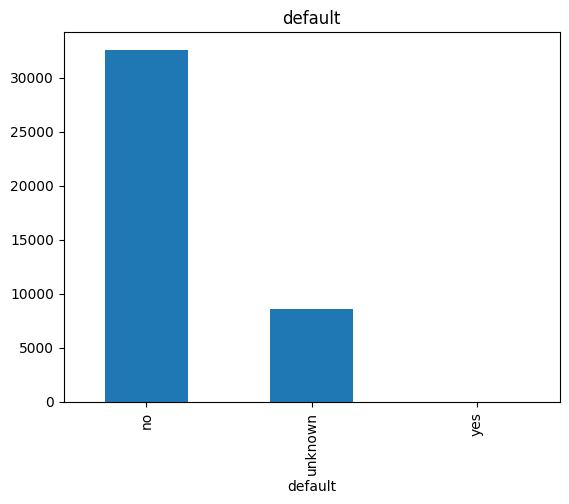

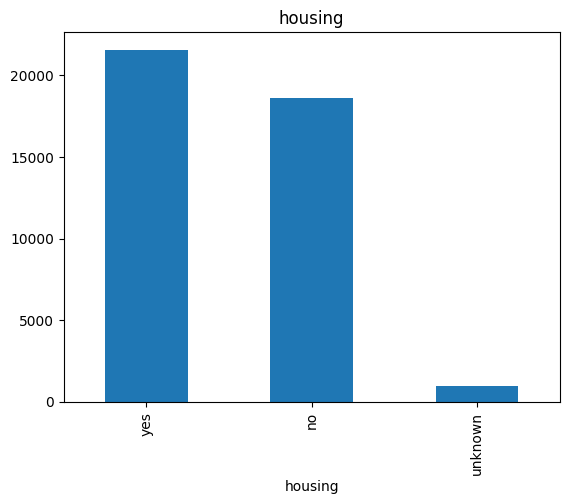

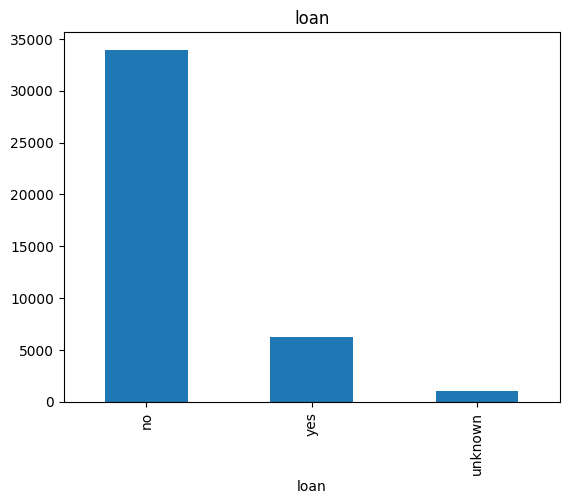

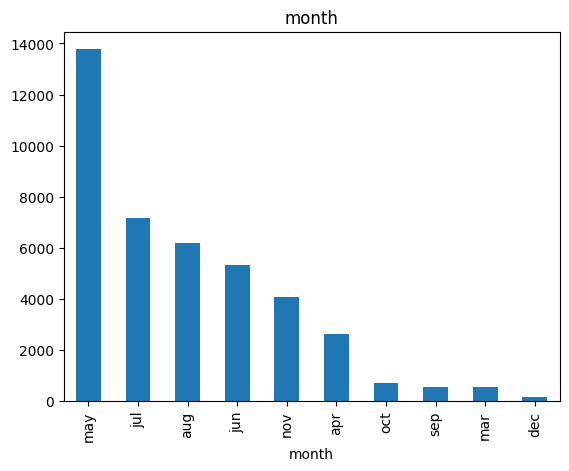

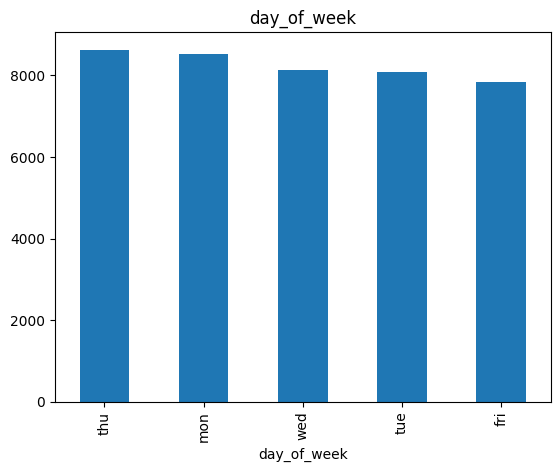

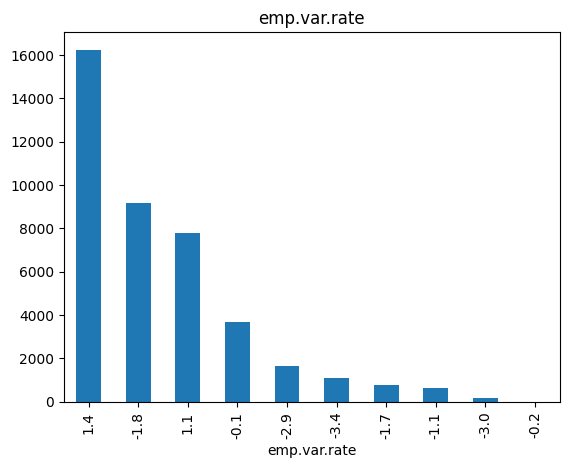

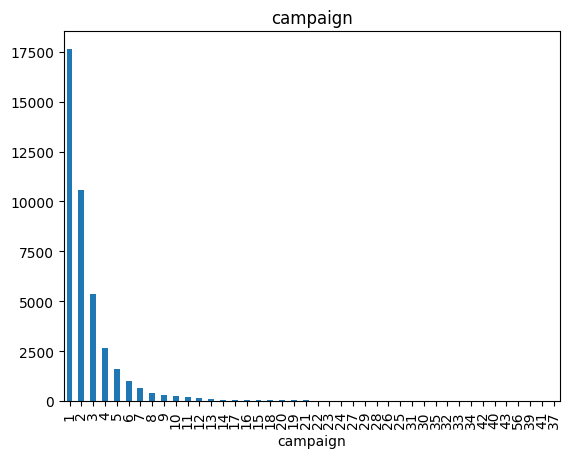

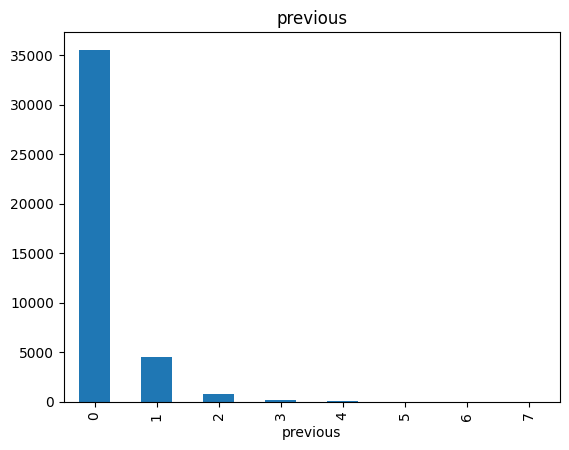

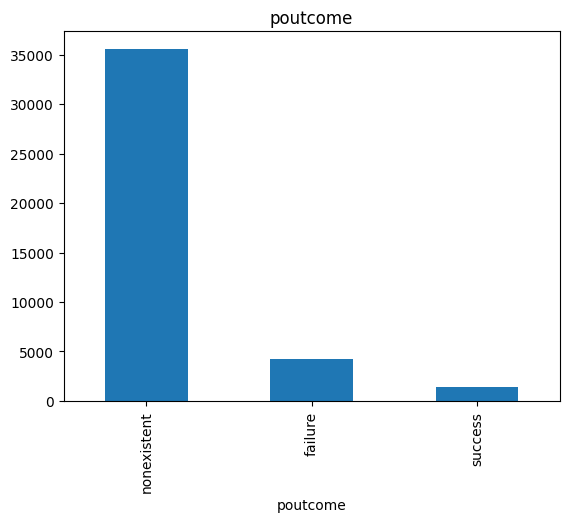

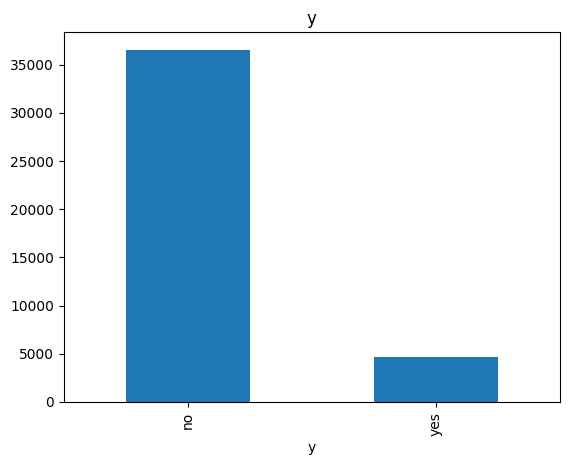

In [8]:
bar_ls = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'emp.var.rate', 'campaign', 'previous', 'poutcome', 'y']
for i in bar_ls:
  data[i].value_counts().plot(kind='bar')
  plt.title(i)
  plt.show()

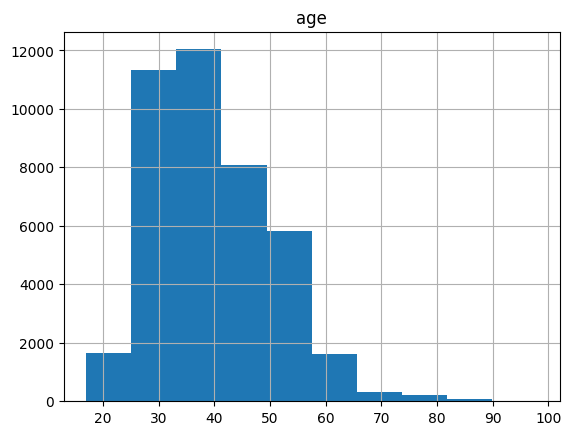

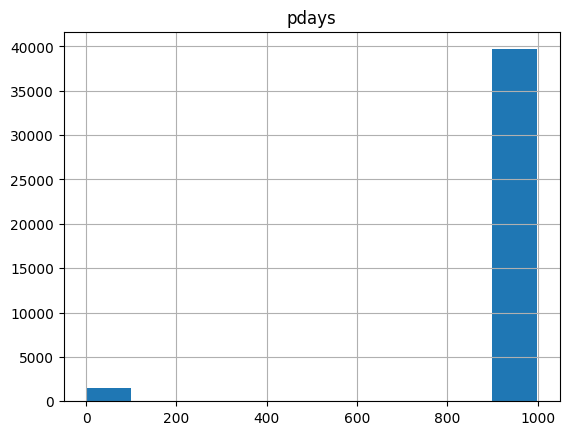

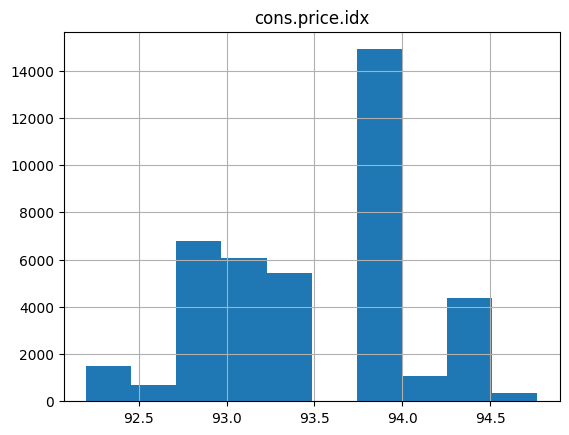

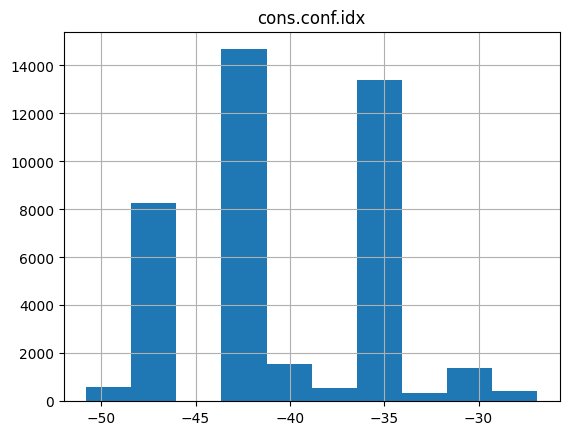

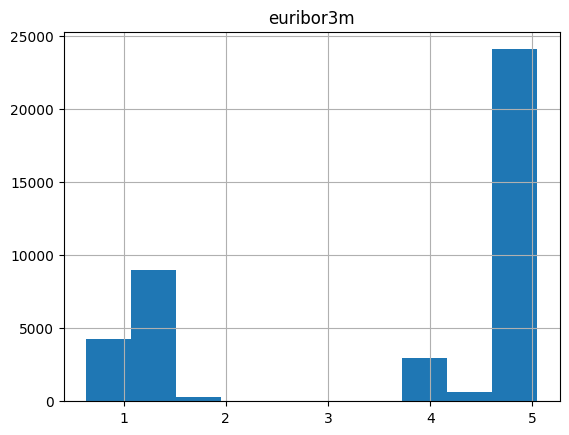

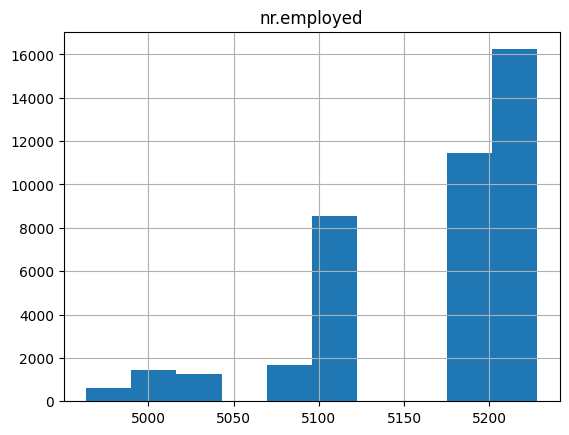

In [9]:
hist_ls = ['age', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for i in hist_ls:
  data[i].hist()
  plt.title(i)
  plt.show()

***Corr Matrix để tính toán đa cộng tuyến***

In [ ]:
df = data.copy()
label_encoders = {}
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,0.007021,-0.024877,-0.017572,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,-0.006923,-0.028468,0.020965,0.011504,-0.008271,-0.016017,0.052760,-0.007880,-0.019574,0.025122
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,-0.007240,-0.037942,0.038689,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199,0.046203
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,0.000371,-0.046626,0.038831,0.017009,-0.043778,-0.081607,0.078799,-0.036380,-0.041492,0.057799
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,0.032825,0.080062,-0.102416,0.023417,0.203263,0.168073,0.026522,0.195336,0.189845,-0.099352
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,-0.011010,-0.010551,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862,0.011552
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,0.005166,0.000345,-0.001327,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.003903,-0.004909
contact,0.007021,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,0.077368,0.117970,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,-0.024877,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,-0.062059,-0.047891,0.103157,-0.065012,-0.178782,-0.004239,0.009652,-0.117264,-0.221425,-0.006065
day_of_week,-0.017572,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,-0.038288,-0.009531,-0.004102,0.018732,0.033245,0.005644,0.041465,0.039043,0.028380,0.015967


In [ ]:
#Lọc ra các cặp có giá trị corr > 0.5
corr_pairs = corr.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]

high_corr_pairs = corr_pairs[corr_pairs > 0.5]
high_corr_pairs = high_corr_pairs.iloc[::2]

In [ ]:
#Lọc ra các giá trị corr giữa các biến đầu vào và output 'label'
corr_label = corr['y']

#Ở đây tiến hành các bước bao gồm: Kiểm tra các giá trị Corr cao trong ma trận:
  #Nếu là corr của biến đầu vào với label thì ta sẽ giữ lại
  #So sánh 2 biến có corr cao, nếu biến nào mà corr của nó với label thấp hơn thì sẽ được loại, ngược lại thì lưu
  #Việc này giúp 2 điều: Xóa đi 1 giá trị trong cặp biến có Corr lớn, và xóa đi giá trị ít tác động đến đầu ra

columns_to_remove = []
for col1, col2 in high_corr_pairs.index:
  if col1 == 'y' or col2 == 'y':
    continue
  else:
    # So sánh giá trị trong corr_label và chọn cột có giá trị thấp hơn để xóa
    if corr_label[col1] < corr_label[col2]:
        columns_to_remove.append(col1)
    else:
        columns_to_remove.append(col2)

columns_to_remove = list(set(columns_to_remove))
print(columns_to_remove)

['nr.employed', 'contact', 'euribor3m', 'emp.var.rate']


In [ ]:
data = data.drop(columns = columns_to_remove)
data

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,1,999,0,nonexistent,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,may,mon,1,999,0,nonexistent,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,may,mon,1,999,0,nonexistent,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,1,999,0,nonexistent,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,may,mon,1,999,0,nonexistent,93.994,-36.4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,nov,fri,1,999,0,nonexistent,94.767,-50.8,yes
41184,46,blue-collar,married,professional.course,no,no,no,nov,fri,1,999,0,nonexistent,94.767,-50.8,no
41185,56,retired,married,university.degree,no,yes,no,nov,fri,2,999,0,nonexistent,94.767,-50.8,no
41186,44,technician,married,professional.course,no,no,no,nov,fri,1,999,0,nonexistent,94.767,-50.8,yes


***Chi-Squared cho các columns Objects***

In [ ]:
obj_cols = data.select_dtypes(include=['object']).columns

remove_obj_cols =[]

#Chi-square test cho các cột Object so với cột Output của data
for i in obj_cols:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(data[i], data['y']))
    print(i, '---', pval)
    if pval > 0.05:
        remove_obj_cols.append(i)
    else:
      continue

print(remove_obj_cols)

job --- 4.189763287563623e-199
marital --- 2.068014648442211e-26
education --- 3.3051890144025054e-38
default --- 5.1619579513916376e-89
housing --- 0.05829447669453452
loan --- 0.5786752870441754
month --- 0.0
day_of_week --- 2.9584820052785324e-05
poutcome --- 0.0
y --- 0.0
['housing', 'loan']


In [ ]:
data = data.drop(columns = remove_obj_cols)

***Spearman Correlation cho các columns dạng số***

In [ ]:
num_cols = data.select_dtypes(exclude=['object']).columns.tolist()
num_cols.append('y')

num_df = data[num_cols]

correlation_results = []

# Duyệt qua tất cả các cột trong DataFrame
for col in num_df.columns:
  corr, p_value = spearmanr(num_df[col], num_df['y'])  # Tính Spearman Correlation
  correlation_results.append((col, corr, p_value))

# Chuyển kết quả thành DataFrame để dễ quan sát
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Spearman Correlation', 'p-value'])

# Hiển thị các thuộc tính có Spearman Correlation đáng kể với biến mục tiêu
print(correlation_df.sort_values(by='Spearman Correlation', ascending=False))

          Feature  Spearman Correlation        p-value
6               y              1.000000   0.000000e+00
3        previous              0.200914   0.000000e+00
5   cons.conf.idx              0.041229   5.733768e-17
0             age             -0.011861   1.607871e-02
1        campaign             -0.063668   2.891014e-38
4  cons.price.idx             -0.122187  9.495550e-137
2           pdays             -0.324942   0.000000e+00


In [ ]:
data = data.drop(columns=['age', 'campaign', 'cons.price.idx'])

**ENCODING**

In [ ]:
###
data = data[['job', 'marital', 'education', 'default', 'month', 'day_of_week', 'pdays', 'previous', 'poutcome', 'cons.conf.idx', 'y']]
###

In [ ]:
obj_cols = data.select_dtypes(include=['object']).columns
for i in obj_cols:
  print(data[i].value_counts())
  print('\n')

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64


month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64


day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri

In [ ]:
#Hàm Label Encoding:
def map_columns(data, column_names=['job', 'marital', 'education', 'default', 'month', 'day_of_week', 'poutcome', 'y']):

    # Các ánh xạ giá trị cho các cột khác nhau
    job_mapping = {'unknown': 0, 'admin.':1, 'blue-collar':2, 'technician':3, 'services':4, 'management':5,
                   'retired':6, 'entrepreneur':7, 'self-employed':8, 'housemaid':9, 'unemployed':10, 'student': 11}

    marital_mapping = {'unknown': 0, 'married': 1, 'single': 2, 'divorced': 3}

    education_mapping = {'unknown': 0, 'university.degree': 1, 'professional.course': 2, 'high.school': 3, 'basic.9y': 4,
                         'basic.6y': 5, 'basic.4y': 6, 'illiterate': 7}

    default_mapping = {'no': 0, 'yes': 1, 'unknown': 2}

    month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}


    day_of_week_mapping = {'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6, 'sat': 7, 'sun':8}

    poutcome_mapping = {'failure': 0, 'success': 1, 'nonexistent': 2}

    y_mapping = {'no': 0, 'yes': 1}

    # Thực hiện ánh xạ cho từng cột trong DataFrame
    mappings = {'job': job_mapping, 'marital': marital_mapping, 'education': education_mapping, 'default': default_mapping,
                'month': month_mapping, 'day_of_week': day_of_week_mapping, 'poutcome': poutcome_mapping, 'y': y_mapping}

    for column in column_names:
        if column in data.columns and column in mappings:
            data[column] = data[column].map(mappings[column])

    return data

In [ ]:
map_columns(data)

**PREDICTION**

In [ ]:
#Hàm đánh giá hiệu suất
def print_scores(y_test, y_pred):
  print(classification_report(y_test, y_pred))

In [ ]:
#Hàm chia tập train-test và MinMax Scaler
def preprocess_data(data_new, test_size=0.2, random_state=42):

    # Chia tập train-test
    X = data_new.drop(columns=['y'], axis=1)
    features = X.columns

    y = data_new['y']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # MinMax Scaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

***1. Random Forest***

In [ ]:
X_train, X_test, y_train, y_test = preprocess_data(data)

model_RF = RandomForestClassifier(n_estimators=200, random_state=42)
model_RF.fit(X_train, y_train)

y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     29245
           1       0.91      0.53      0.67      3705

    accuracy                           0.94     32950
   macro avg       0.93      0.76      0.82     32950
weighted avg       0.94      0.94      0.93     32950

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7303
           1       0.51      0.29      0.37       935

    accuracy                           0.89      8238
   macro avg       0.71      0.63      0.65      8238
weighted avg       0.87      0.89      0.87      8238



***2.XGBoost***

In [ ]:
#XGBOOST
X_train, X_test, y_train, y_test = preprocess_data(data)

model_XGB = xgb.XGBClassifier()
model_XGB.fit(X_train, y_train)

y_train_pred = model_XGB.predict(X_train)
y_test_pred = model_XGB.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     29245
           1       0.85      0.36      0.51      3705

    accuracy                           0.92     32950
   macro avg       0.88      0.68      0.73     32950
weighted avg       0.92      0.92      0.91     32950

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.58      0.25      0.35       935

    accuracy                           0.89      8238
   macro avg       0.75      0.62      0.65      8238
weighted avg       0.87      0.89      0.88      8238



***3.SMOTE***

In [ ]:
X_train, X_test, y_train, y_test = preprocess_data(data)

smote = SMOTE(k_neighbors=8)
X_train_resample, y_train_resample = smote.fit_resample(X_train,y_train)

In [ ]:
#Random Forest SMOTE
model_RF_sm = RandomForestClassifier(n_estimators=200, random_state=42)
model_RF_sm.fit(X_train_resample, y_train_resample)

y_train_pred = model_RF_sm.predict(X_train_resample)
y_test_pred = model_RF_sm.predict(X_test)

print_scores(y_train_resample, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     29245
           1       0.97      0.92      0.94     29245

    accuracy                           0.95     58490
   macro avg       0.95      0.95      0.95     58490
weighted avg       0.95      0.95      0.95     58490

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7303
           1       0.43      0.38      0.40       935

    accuracy                           0.87      8238
   macro avg       0.67      0.66      0.66      8238
weighted avg       0.87      0.87      0.87      8238



In [ ]:
model_xgb_sm = xgb.XGBClassifier()
model_xgb_sm.fit(X_train_resample, y_train_resample)

y_train_pred = model_xgb_sm.predict(X_train_resample)
y_test_pred = model_xgb_sm.predict(X_test)

print_scores(y_train_resample, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     29245
           1       0.96      0.88      0.92     29245

    accuracy                           0.92     58490
   macro avg       0.92      0.92      0.92     58490
weighted avg       0.92      0.92      0.92     58490

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7303
           1       0.49      0.37      0.42       935

    accuracy                           0.89      8238
   macro avg       0.71      0.66      0.68      8238
weighted avg       0.87      0.89      0.88      8238



***4.MLP***

In [ ]:
#Thiết lập mô hình MLP
class MultilayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        np.random.seed(42)
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))

        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

        self.learning_rate = learning_rate

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def sigmoid_derivative(x):
        return x * (1 - x)

    def forward(self, X):
        self.input_data = X

        # Calc of activiations of hidden layer
        self.hidden_layer = self.sigmoid(np.dot(self.input_data, self.weights_input_hidden) + self.bias_hidden)

        # Calc of activation of output layer
        self.output_layer = self.sigmoid(np.dot(self.hidden_layer, self.weights_hidden_output) + self.bias_output)

        return self.output_layer

    def backward(self, y, output):
        y = np.array(y)
        output_error = y - output
        d_output = output_error * self.sigmoid_derivative(output)

        hidden_layer_error = d_output.dot(self.weights_hidden_output.T)
        d_hidden_layer = hidden_layer_error * self.sigmoid_derivative(self.hidden_layer)

        # Update of the weights and biases
        self.weights_input_hidden += self.input_data.T.dot(d_hidden_layer) * self.learning_rate
        self.bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * self.learning_rate

        self.weights_hidden_output += self.hidden_layer.T.dot(d_output) * self.learning_rate
        self.bias_output += np.sum(d_output, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs):
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(y, output)

            # Calculation of Mean Square Error
            mse = np.mean((y - output) ** 2)
            losses.append(mse)

            if epoch == 0:
                print(f"Epoch {epoch+1}, Loss: {mse:.4f}")
            if (epoch + 1) % 1000 == 0:
                print(f"Epoch {epoch+1}, Loss: {mse:.4f}")

        return losses

    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = preprocess_data(data)
#y_train = y_train.reshape(-1, 1)

mlp = MultilayerPerceptron(input_size = X_train.shape[1], hidden_size=10, output_size=1, learning_rate=0.01)
losses = mlp.train(X_train, y_train, epochs=300)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

***5.SVM***

In [ ]:
#SMOTE cho SVM
X_train, X_test, y_train, y_test = preprocess_data(data)
smote = SMOTE(k_neighbors=8)
X_train_resample, y_train_resample = smote.fit_resample(X_train,y_train)

model_SVM = SVC()
model_SVM.fit(X_train_resample, y_train_resample)

y_train_pred = model_SVM.predict(X_train_resample)
y_test_pred = model_SVM.predict(X_test)

print_scores(y_train_resample, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.64      0.85      0.73     29245
           1       0.78      0.53      0.63     29245

    accuracy                           0.69     58490
   macro avg       0.71      0.69      0.68     58490
weighted avg       0.71      0.69      0.68     58490

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7303
           1       0.30      0.52      0.38       935

    accuracy                           0.81      8238
   macro avg       0.62      0.68      0.63      8238
weighted avg       0.86      0.81      0.83      8238



***6.Neural Networks***

In [ ]:
X_train, X_test, y_train, y_test = preprocess_data(data)

def train_model(X_train, y_train, num_nodes, dropout_prob, lr, epochs):
    # Định nghĩa đầu vào cho mô hình
    inputs = tf.keras.Input(shape=(X_train.shape[1],))

    # Xây dựng mô hình bằng Functional API
    x = tf.keras.layers.Dense(num_nodes, activation='relu')(inputs)
    x = tf.keras.layers.Dropout(dropout_prob)(x)
    x = tf.keras.layers.Dense(num_nodes, activation='relu')(x)
    x = tf.keras.layers.Dropout(dropout_prob)(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    nn_model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compile mô hình
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                     metrics=['accuracy'])

    # Huấn luyện mô hình
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, validation_split=0.2, verbose=0
    )

    return nn_model, history

In [ ]:
least_test_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, epochs)
        test_loss = model.evaluate(X_test, y_test)[0]
        if test_loss < least_test_loss:
          least_test_loss = test_loss
          least_loss_model = model

16 nodes, dropout 0, lr 0.01
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8936 - loss: 0.3014
16 nodes, dropout 0, lr 0.005
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8928 - loss: 0.2986
16 nodes, dropout 0, lr 0.001
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8950 - loss: 0.2974
16 nodes, dropout 0.2, lr 0.01
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8941 - loss: 0.3008
16 nodes, dropout 0.2, lr 0.005
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8946 - loss: 0.2999
16 nodes, dropout 0.2, lr 0.001
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8935 - loss: 0.2972
32 nodes, dropout 0, lr 0.01
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8950 - loss: 0.2982
32 nodes, dropout 0, lr 0.005
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8981 - loss: 0.2988
32 nodes, dropout 0, lr 0.001
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8950 - loss: 0.2898
32 nodes, dropout 0.2, lr 0.01
258/258 ━━━━━━━━━━━━━

In [ ]:
print(f"Best model configuration:")
print(f"Least test loss: {least_test_loss}")

# Dự đoán và in báo cáo phân loại
if least_loss_model:
    y_pred = least_loss_model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)  # Chuyển đổi xác suất thành nhãn lớp
    report = classification_report(y_test, y_pred_classes, target_names=['0', '1'])
    print("Classification Report:")
    print(report)
else:
    print("No model was trained.")

Best model configuration:
Least test loss: 0.292272686958313
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.61      0.24      0.34       935

    accuracy                           0.90      8238
   macro avg       0.76      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238



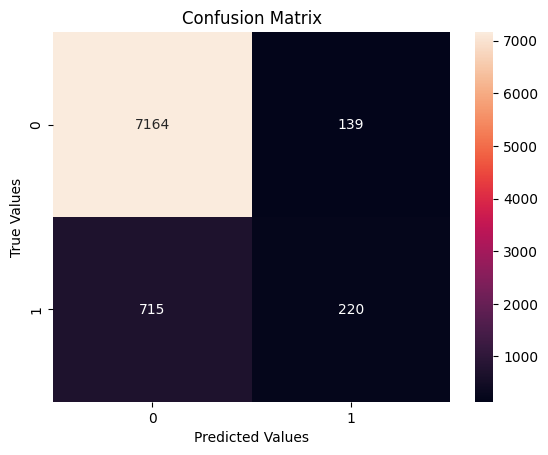

In [ ]:
y_pred_classes = (y_pred > 0.5).astype(int) # Convert probabilities to class labels
conf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_matrix, xticklabels=["0", "1"], yticklabels=["0", "1"], annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()